# 1. Avbildningen med Linse

In [1]:
import numpy as np

d_original = 15.1  # Diameter av mønsteret på lampen [mm]
n = 1.520  # Brytningsindex til linsene
S1_obj = 1260  # Avstand Lampe - Linse [mm]
S1_img = 240  # Avstand Linse - Bilde [mm]
S2_obj = 300  # Avstand Lampe - Linse [mm]
S2_img = 600  # Avstand Linse - Bilde [mm]
sph_met_rad = 12  # Radius av sfærometeret[mm]
d = 0.36  # Målte verdien med sfærometeret [mm]


def focal_len(s_obj, s_img):  # Beregener fokallengde
    return 1/((1/s_obj) + (1/s_img))


def magnification(s_obj, s_img):  # Beregner forstørrelse
    return s_img/s_obj


def lens_rad(D, d):  # Beregner krumningsradius
    return ((D**2) + (d**2))/(2*d)


def linsemaker(n, R1, R2):  # Linsemakerformelen
    return 1/((n-1)*((1/R1)-(1/R2)))


f1 = focal_len(S1_obj, S1_img)  # Fokallengde for punkt 3
M1 = magnification(S1_obj, S1_img)  # Forstørrelse for 150 cm avstand
M2 = magnification(S1_img, S1_obj)  # Forstørrelse for 150 cm avstand
M3 = magnification(S2_obj, S2_img)  # Forstørrelse for 90 cm avstand
M4 = magnification(S2_img, S2_obj)  # Forstørrelse for 90 cm avstand
rad_lens = lens_rad(sph_met_rad, d)  # Krumningsradius for 200 mm linsen  [mm]
f1_linsemaker = linsemaker(n, rad_lens, -rad_lens)  # Fokallengde for 200 mm linsen  [mm]

print(f'Forstørrelse for 150 cm avstand:    {M1: .2f} X')
print(f'Forstørrelse for 150 cm avstand:    {M2: .2f} X')
print(f'Krumningsradius for 200 mm linsen:  {rad_lens: .2f} [mm]')
print(f'Fokallengde for 200 mm linsen:      {f1_linsemaker: .2f} [mm]')


Forstørrelse for 150 cm avstand:     0.19 X
Forstørrelse for 150 cm avstand:     5.25 X
Krumningsradius for 200 mm linsen:   200.18 [mm]
Fokallengde for 200 mm linsen:       192.48 [mm]


# 2. Lysbunter og Fokus Uendelig Langt Borte

- Lysbunten divergerer når vi flytter skjermen lenger unna linsen
- Økt avstand mellom lyskilden og linsen gjør at lysbunten konvergerer
- Ved å sette linsen, **10.5 cm** unna lyskilden endrer ikke lysbunten størrelse når den flyttes frem eller tilbake.
  Denne avstanden kalles **fokallengden**
- Ved en distanse på 2X fokallengden på 21 cm blir lysbunten et konsentrert punkt TODO: Sammenlign med oppgave 1
- TODO: Skjønner ikke helt spørmålet "*Diskuter kort hvordan vi med en linse kan sende mest mulig lys til et punkt i endelig avstand og til
et punkt veldig langt borte*". 
Mener de kanskje "*sende mest mulig lys FRA et punkt i endelig avstand TIL et punkt veldig langt borte*", eller "*sende mest mulig lys TIL et punkt i endelig avstand FRA et punkt veldig langt borte*"
Jeg velger å tolke det som "*Hvordan kan vi sende mest mulig lys fra en kilde uendelig langt unna, til et punkt i endelig avstand*". Da er svaret: Å bruke en konveks linse som samler lys til ett fokuspunkt. 


# 3 Lupe
## 1.
Den grønne lyskilden er på høyre side, og den rød på venstre. Etter å ha passert gjennom linsen byttet de plass slik at den grønne lysbunten var på venstre side, og den røde lysbunten på høyre. Når vi flyttet skjermen bakover divergerte de, men holdt konstant radius. 

## 2. 
Når vi ser gjennom linsen ser vi et forstørret bildet av lyskilden. Minner om et mikroskop. Alt er i fokus. 

## 3. 
- Vi setter 50 mm linsen i en avstand **5.75 cm** unna lyskilden for å oppnå **konstant diameter**
- **Vinkelen** mellom lysbuntene er **større** for 50 mm linsen, enn for en 100 mm linse
- Bildet blir enda mer forstørret ved bruk av 50 mm linse. 


# 4. Teleskop
- Vi ser et klart bilde av mønsteret på skyggemønsteret TODO: Dobbeltsjekk om stemmer. 

# 5. Kamera og Fotoner

TODO: Mangler siste oppgave med plot av støy mot middelverdi. 

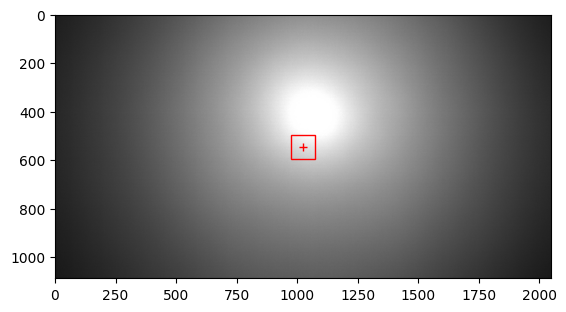

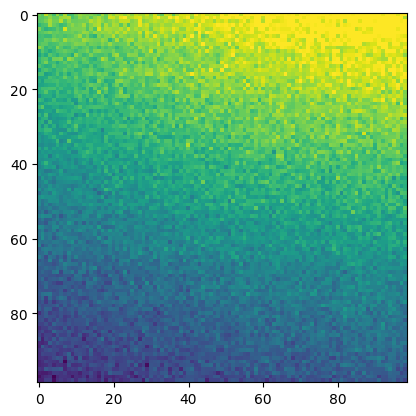

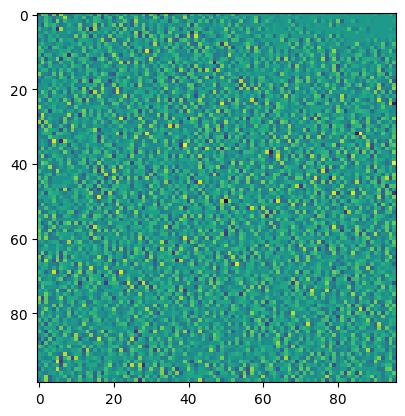

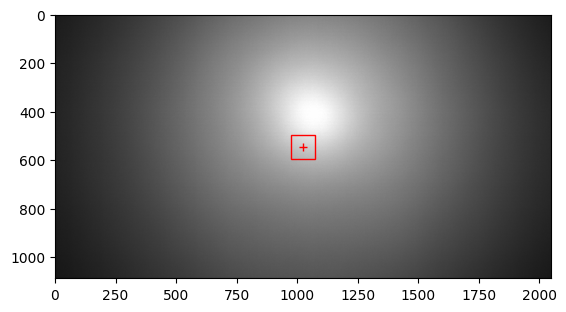

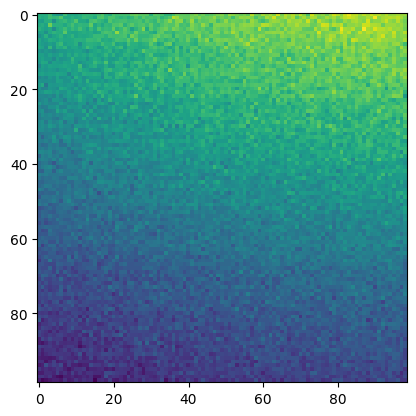

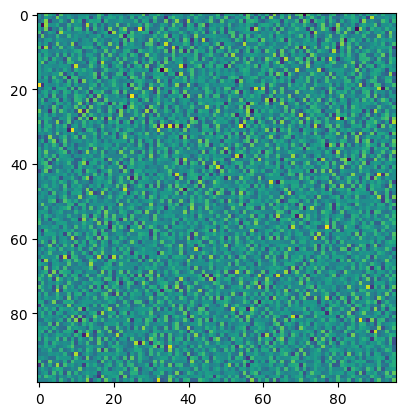

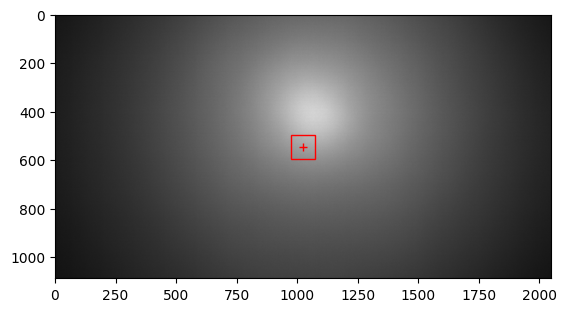

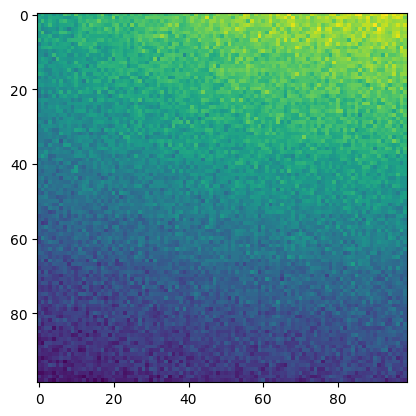

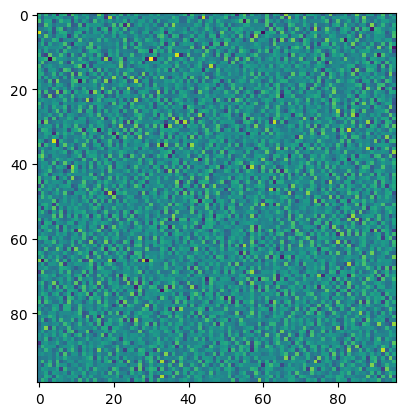

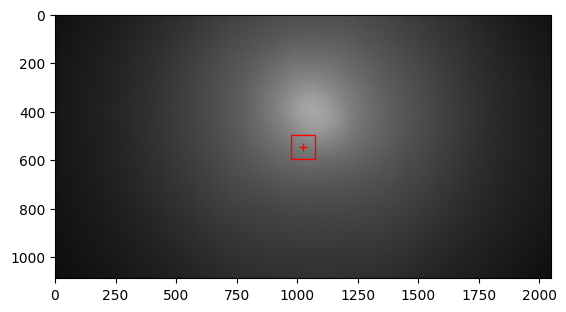

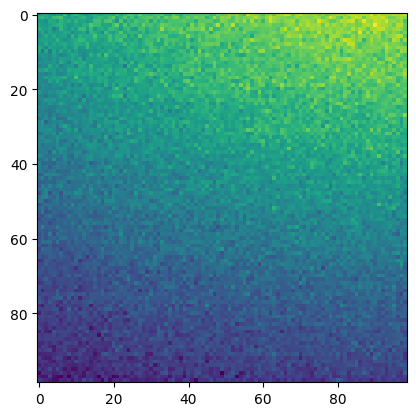

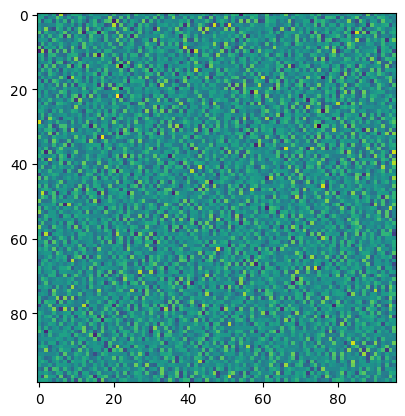

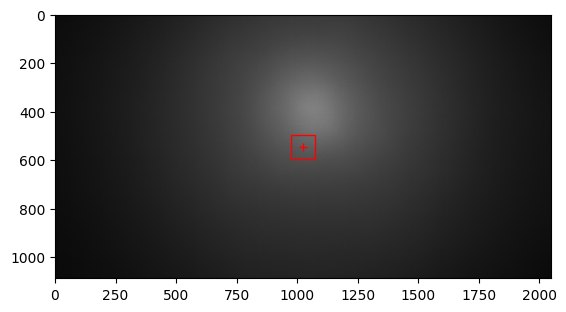

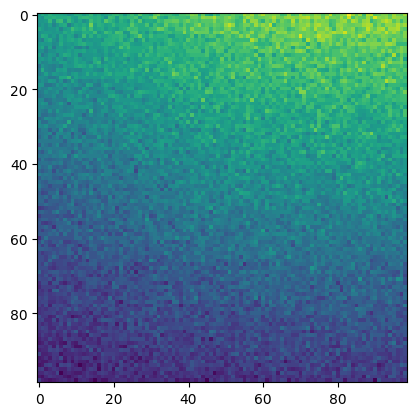

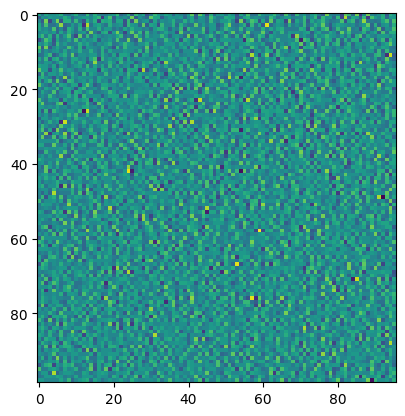

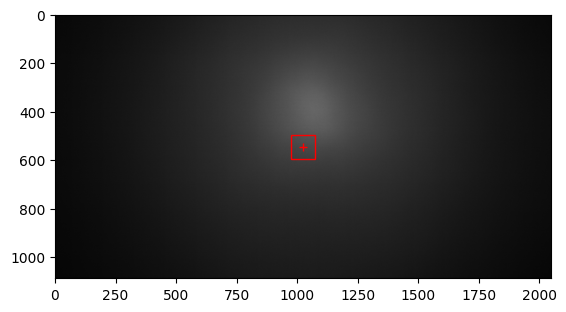

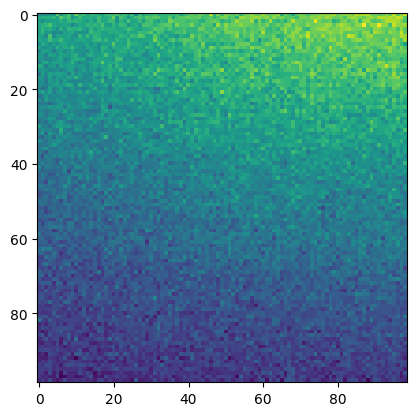

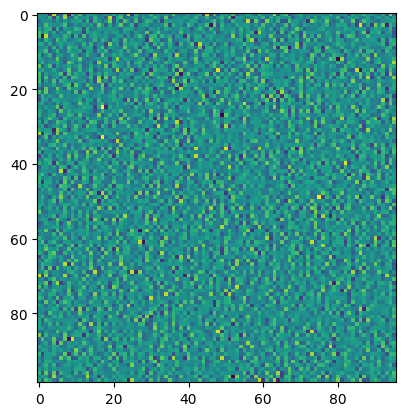

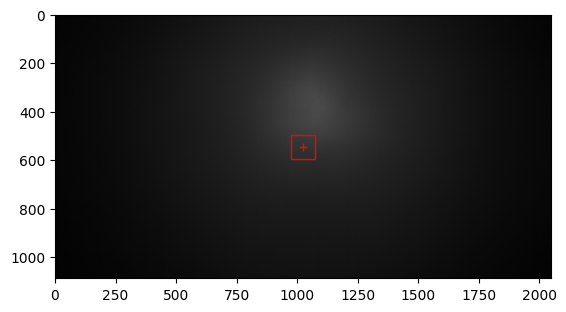

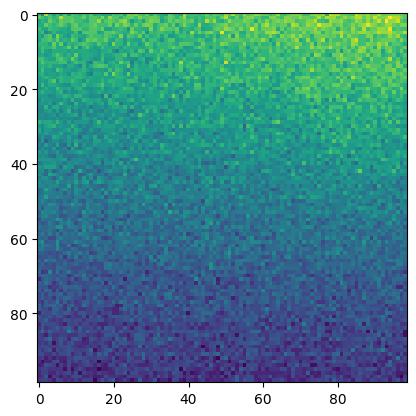

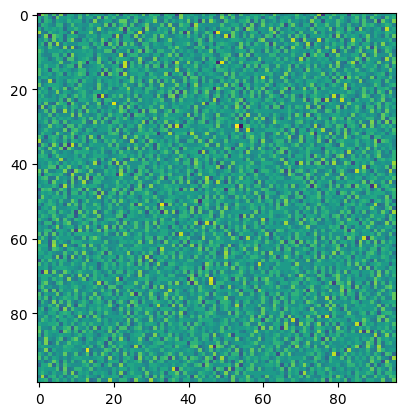

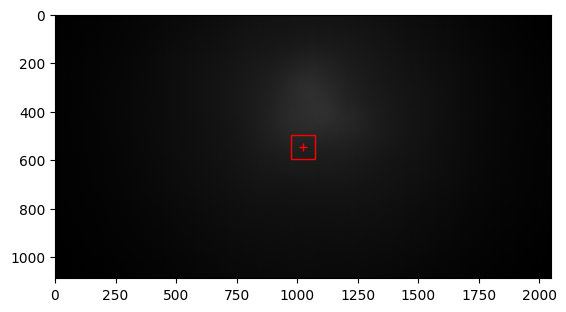

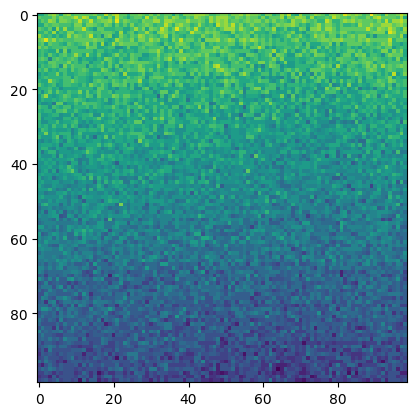

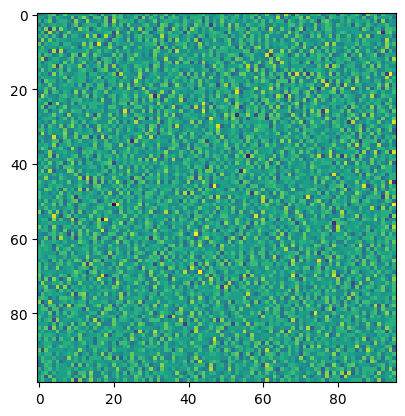

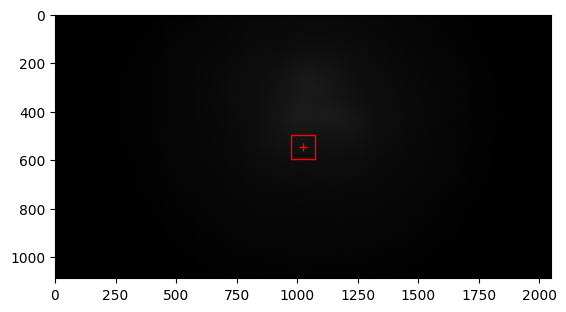

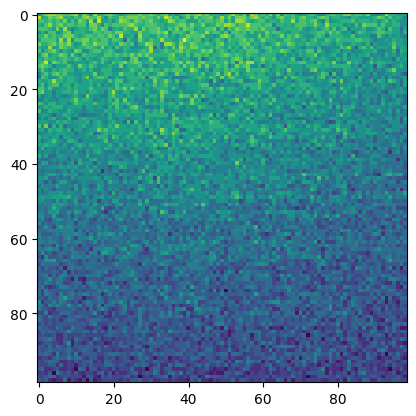

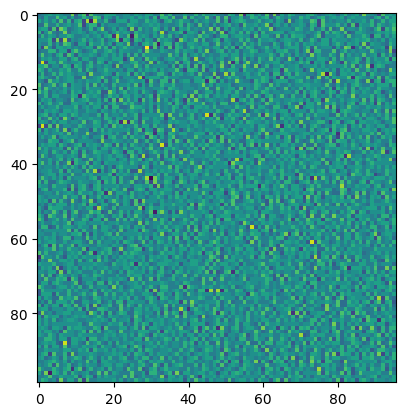

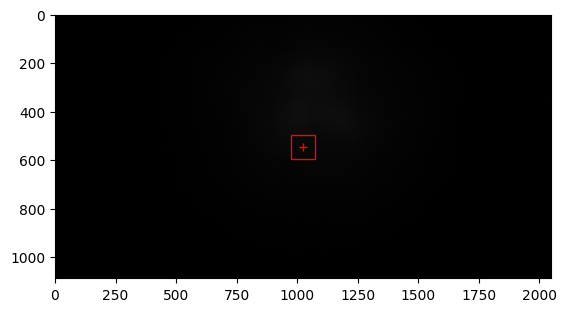

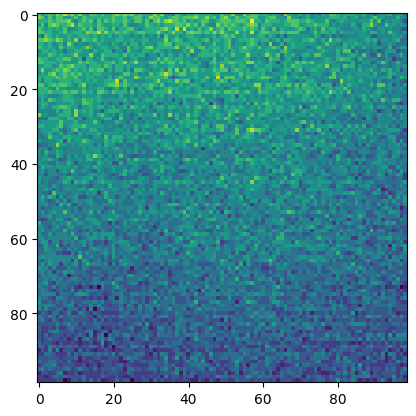

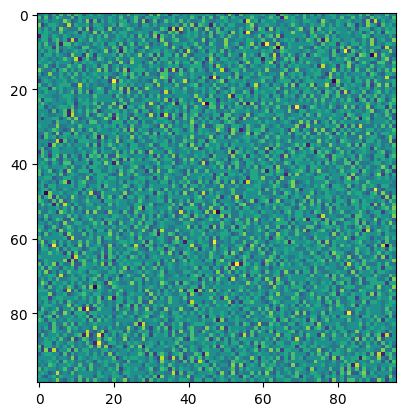

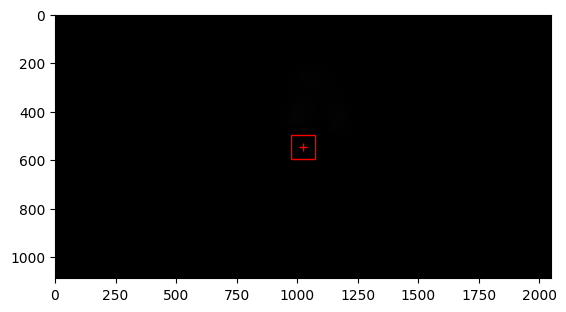

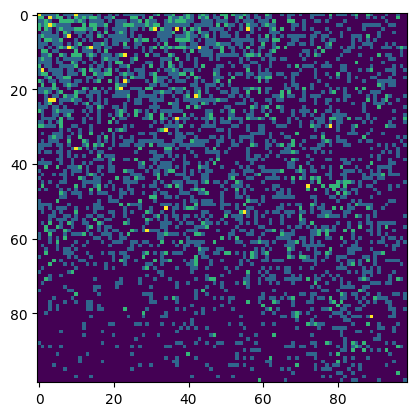

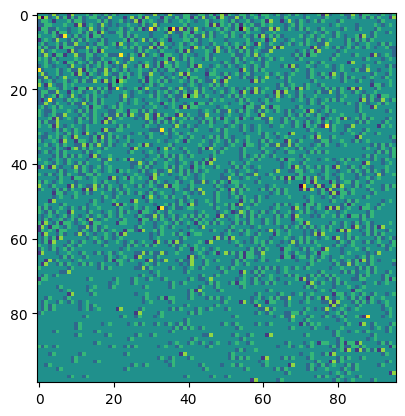

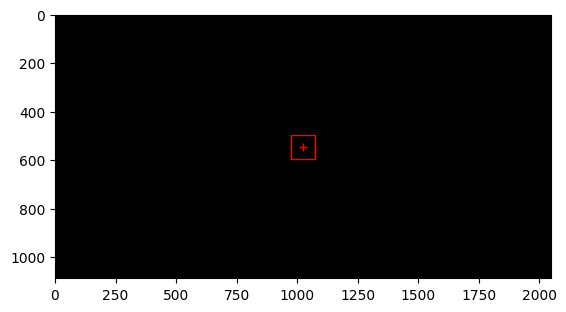

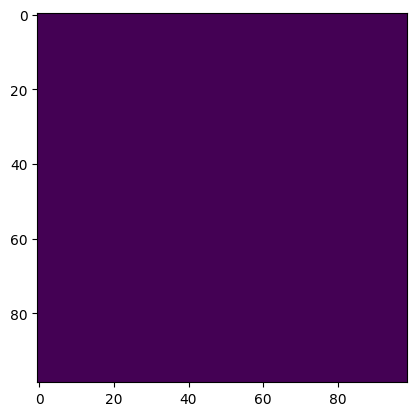

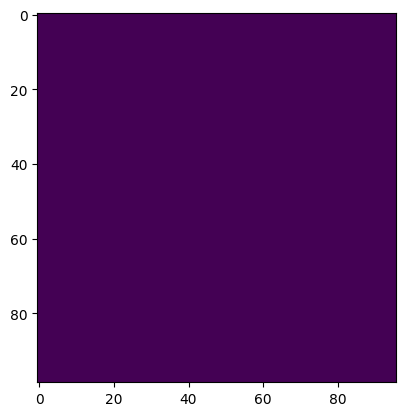

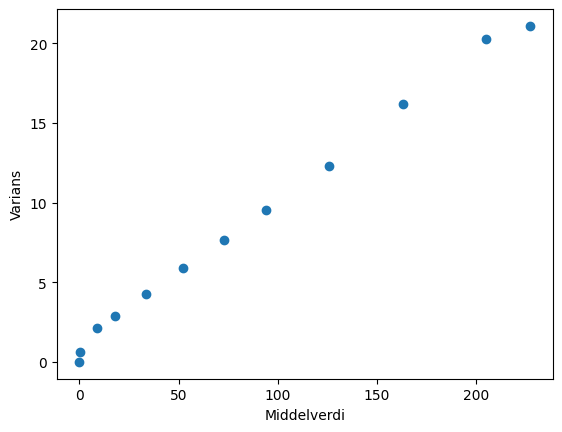

#    Mid.verdi     varians
----------------------------
1    m = 227.32,   v = 21.10
2    m = 205.01,   v = 20.30
3    m = 163.29,   v = 16.17
4    m = 125.67,   v = 12.32
5    m =  93.91,   v =  9.56
6    m =  72.95,   v =  7.63
7    m =  52.29,   v =  5.87
8    m =  33.48,   v =  4.24
9    m =  18.01,   v =  2.91
10   m =   8.82,   v =  2.14
11   m =   0.39,   v =  0.64
12   m =   0.00,   v =  0.00


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def image_noise_analysis(filename):
    ny = 100
    nx = 100
    im1 = cv2.imread(filename)
    im1 = np.flip(im1, axis=2)

    #print(im1)
    #printer bildet

    Ny = im1.shape[0]
    Nx = im1.shape[1]
    #print(Ny, Nx)
    cc = [round(Nx/2), round(Ny/2)]

    fig, ax = plt.subplots()
    ax.imshow(im1)
    #lager et rektangulært fokuspunkt
    rect = mpl.patches.Rectangle((cc[0] - round(nx/2),cc[1] - round(ny/2)), nx,ny,
                                 linewidth=1, edgecolor='r', facecolor=None, fill = False)
    plt.plot(cc[0], cc[1], 'r+')
    ax.add_patch(rect)
    plt.show()

    #henter ut grønn channel verdier
    im2 = im1[:,:,2]
    #print(np.shape(im1))



    im2 = im1[cc[1] - round(ny/2):cc[1]+round(ny/2)-1, cc[0]-round(nx/2):cc[0] + round(nx/2)-1,2]
    m = np.mean(im2[:])
    im2 = im2.astype('int')
    #print(type(im2[0,0]))
    fig2, ax2 = plt.subplots()
    ax2.imshow(im2)
    plt.show()

    #forskjell i intensitet mellom naboer
    im3 = im2[:,1:-2] - im2[:,2:-1]
    #varianse
    v = np.var(im3[:])
    fig3, ax3 = plt.subplots()
    ax3.imshow(im3)
    plt.show(block = False)
    # print('middelverdi:', m, 'varians til differanse mellom nabopiksler:', v)
    return m, v

M, V = [], []
path = os.path.abspath("")
for i in range(1,13):
    filename = os.path.join(path, f'bilde_2023-05-16_{i}.png')
    m, v = image_noise_analysis(filename)
    M.append(m)
    V.append(v)
    

plt.close()
plt.scatter(M,V)
plt.xlabel('Middelverdi')
plt.ylabel('Varians')
plt.show()

print(f'{"#":<5}{"Mid.verdi ":<12}{"varians":>9}')
print(f'{"-"*28}')
for m, v, i in zip(M, V, range(1,13)):
    print(f"{i:<4} m = {m:>6.2f},   v = {v:>5.2f}")